<a href="https://colab.research.google.com/github/Timoh-top/Timoh-top/blob/main/Fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly
import plotly.express as px

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
# Checking for the description of the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 47627 entries, 0 to 47626
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    47627 non-null  int64  
 1   V1      47627 non-null  float64
 2   V2      47627 non-null  float64
 3   V3      47627 non-null  float64
 4   V4      47627 non-null  float64
 5   V5      47627 non-null  float64
 6   V6      47627 non-null  float64
 7   V7      47627 non-null  float64
 8   V8      47627 non-null  float64
 9   V9      47627 non-null  float64
 10  V10     47627 non-null  float64
 11  V11     47627 non-null  float64
 12  V12     47627 non-null  float64
 13  V13     47627 non-null  float64
 14  V14     47627 non-null  float64
 15  V15     47627 non-null  float64
 16  V16     47627 non-null  float64
 17  V17     47627 non-null  float64
 18  V18     47627 non-null  float64
 19  V19     47627 non-null  float64
 20  V20     47627 non-null  float64
 21  V21     47627 non-null  float64
 22  V22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,...,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000
mean,28182.806538,-0.240732,0.021474,0.694689,0.191060,-0.249825,0.102321,-0.119863,0.053449,0.141195,...,-0.027059,-0.107091,-0.039399,0.007890,0.136314,0.022561,0.004907,0.004021,91.777163,0.003065
std,13001.674731,1.884803,1.626534,1.519910,1.402208,1.412866,1.309942,1.282115,1.216943,1.214115,...,0.737251,0.637200,0.579666,0.594175,0.438367,0.502411,0.388191,0.335275,249.818013,0.055283
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,20517.000000,-0.990013,-0.548687,0.220591,-0.714465,-0.857321,-0.636477,-0.602244,-0.146951,-0.597979,...,-0.231991,-0.528167,-0.179247,-0.322459,-0.128057,-0.329467,-0.063838,-0.006862,7.590000,0.000000
50%,32929.000000,-0.248836,0.085546,0.800268,0.195057,-0.282233,-0.151974,-0.074940,0.057085,0.026136,...,-0.069134,-0.081945,-0.051439,0.061661,0.175871,-0.068195,0.008665,0.021873,24.990000,0.000000
75%,38235.500000,1.156440,0.736947,1.432177,1.070586,0.286643,0.492730,0.425897,0.329624,0.837289,...,0.107256,0.306116,0.078475,0.401231,0.421741,0.302743,0.083933,0.076168,83.110000,0.000000
max,43282.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


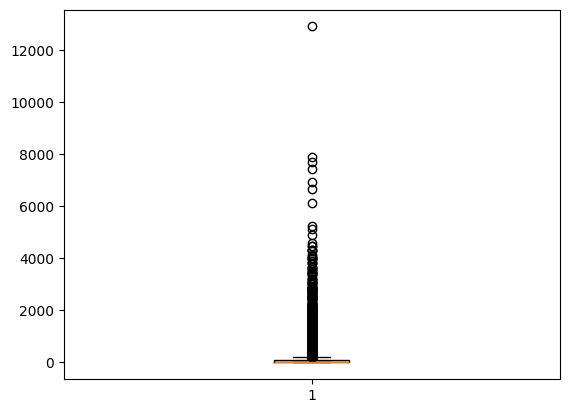

In [7]:
plt.boxplot(df['Amount']);

In [ ]:
# checking for the class imbalance
df['Class'].value_counts(normalize=True)

,proportion
Class,
0.0,0.99738
1.0,0.00262


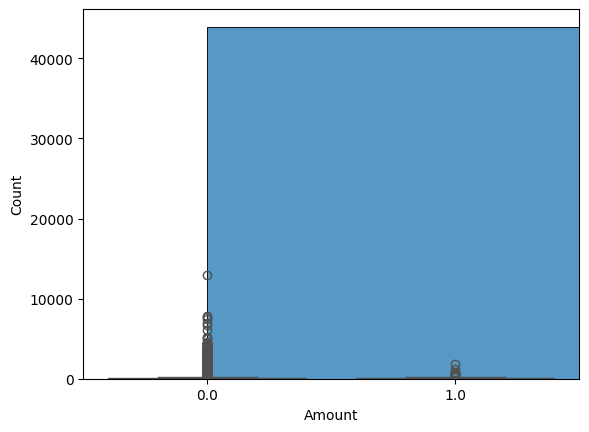

In [8]:
import seaborn as sns

sns.histplot(df['Amount'], bins=50)
sns.boxplot(x='Class', y='Amount', data=df);

In [9]:
#Checking for the amount of values present in the class and the sum
print(list(df["Class"].unique()))
print(list(df["Class"].value_counts()))

[np.float64(0.0), np.float64(1.0)]
[47481, 146]


In [10]:
# correlation with Class
df.corrwith(df["Class"])

,0
Time,-0.006536
V1,-0.220880
V2,0.186846
V3,-0.408689
V4,0.230421
V5,-0.215258
V6,-0.101294
V7,-0.346929
V8,0.170748
V9,-0.172080


<Axes: >

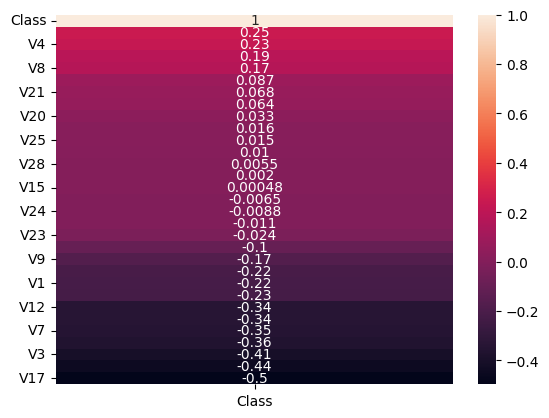

In [11]:
# correlations with amount and class
corr = df.corr()
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True)

***HANDLING THE CLASS IMBALANCE***

In [12]:
# Oversampling minority class
from imblearn.over_sampling import SMOTE
X, y = df.drop('Class', axis=1), df['Class']
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
X_resampled.shape, y_resampled.shape

((94962, 30), (94962,))

In [13]:
# Scaling amount and time
from sklearn.preprocessing import StandardScaler

df['scaled_amount'] = StandardScaler().fit_transform(df[['Amount']])
df['scaled_time'] = StandardScaler().fit_transform(df[['Time']])

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.231542,-2.167652
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.356612,-2.167652
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.148379,-2.167575
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.126985,-2.167575
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,-0.087213,-2.167498


***TRAIN AND TESTING MODEL***

In [15]:
# Splitting the train and test data
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

***EVALUATION AND PREDICTION***

In [17]:
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)


In [19]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_scores)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.9563131197860535


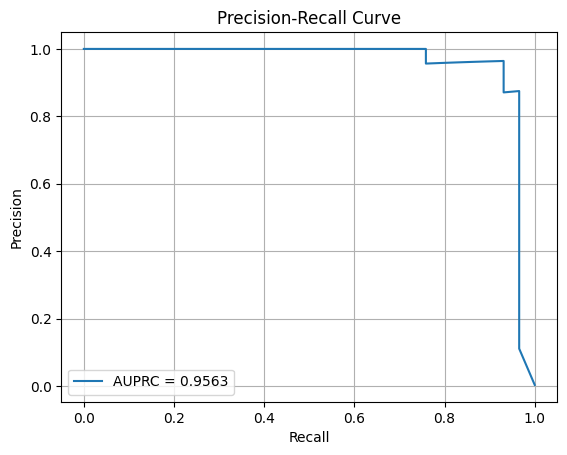

In [20]:
import matplotlib.pyplot as plt

plt.plot(recall, precision, label=f'AUPRC = {auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show();